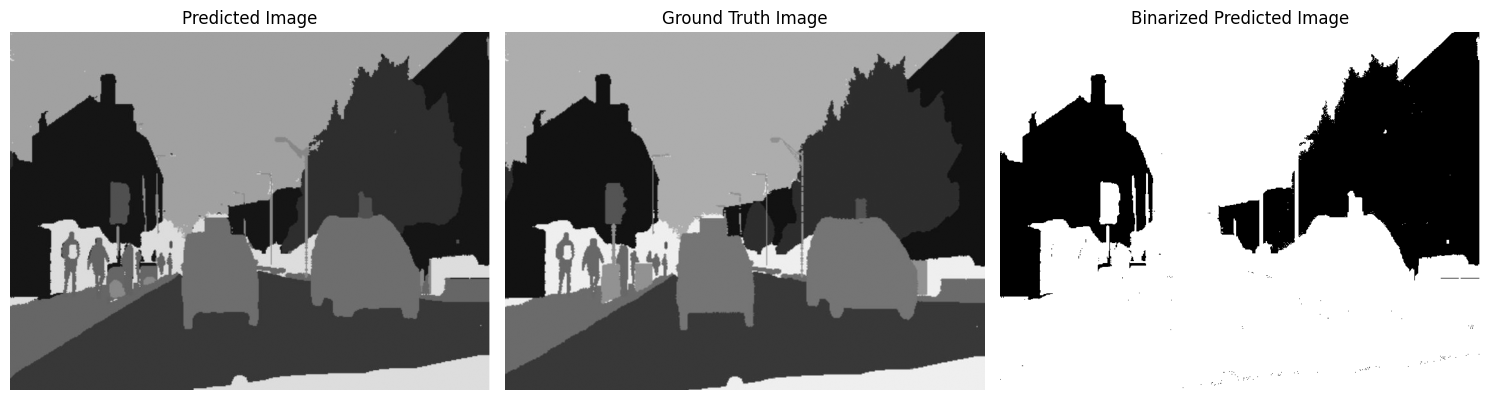

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch

# Load images
predicted_image = Image.open('PREDICTED_L.jpg').convert('L')
ground_truth_image = Image.open('GT_L.jpg').convert('L')

# Resize the images to match each other (resize to the shape of the predicted image)
ground_truth_image_resized = ground_truth_image.resize(predicted_image.size)

# Convert images to NumPy arrays
predicted_image_np = np.array(predicted_image)
ground_truth_image_resized_np = np.array(ground_truth_image_resized)

# Convert to PyTorch tensors
predicted_tensor = torch.tensor(predicted_image_np, dtype=torch.float32)
ground_truth_tensor = torch.tensor(ground_truth_image_resized_np, dtype=torch.float32)

# Binarize the tensors (thresholding)
predicted_tensor_bin = (predicted_tensor > 128).int()
ground_truth_tensor_bin = (ground_truth_tensor > 128).int()

# Plot the images for visualization
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Show the predicted image
axs[0].imshow(predicted_image_np, cmap='gray')
axs[0].set_title('Predicted Image')
axs[0].axis('off')

# Show the ground truth image
axs[1].imshow(ground_truth_image_resized_np, cmap='gray')
axs[1].set_title('Ground Truth Image')
axs[1].axis('off')

# Show the binarized predicted image
axs[2].imshow(predicted_tensor_bin.numpy(), cmap='gray')
axs[2].set_title('Binarized Predicted Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()


In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import time

# Start the timer
start_time = time.time()

# Load the images
predicted_image = Image.open('PREDICTED_L.jpg').convert('L')  # Ensure images are in single channel (grayscale)
ground_truth_image = Image.open('GT_L.jpg').convert('L')

# Resize the ground truth image to match the predicted image's size
ground_truth_image_resized = ground_truth_image.resize(predicted_image.size)

# Convert images to NumPy arrays
predicted_image_np = np.array(predicted_image)
ground_truth_image_resized_np = np.array(ground_truth_image_resized)

# Assuming the images are multi-class (e.g., 4 classes: 0, 1, 2, 3), we can define the classes
num_classes = len(np.unique(ground_truth_image_resized_np))
print(num_classes)

# Compute confusion matrix for multi-class
conf_matrix = confusion_matrix(ground_truth_image_resized_np.flatten(), predicted_image_np.flatten(), labels=range(num_classes))

# Calculate Precision, Recall, and F1 Score for each class
precision, recall, f1, support = precision_recall_fscore_support(
    ground_truth_image_resized_np.flatten(), predicted_image_np.flatten(), average=None, labels=range(num_classes))

# Print out the Precision, Recall, and F1 scores for each class
for i in range(num_classes):
    print(f"Class {i}: Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1 Score={f1[i]:.4f}")

# Compute Macro Average F1 Score
macro_f1_score = np.mean(f1)
print(f"Macro Average F1 Score: {macro_f1_score:.4f}")

# Compute Pixel Accuracy
total_pixels = predicted_image_np.size
correct_pixels = np.sum(ground_truth_image_resized_np == predicted_image_np)
pixel_accuracy = correct_pixels / total_pixels
print(f"Pixel Accuracy: {pixel_accuracy:.4f}")


# Stop the timer and calculate the elapsed time
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")


141
Class 0: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 1: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 2: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 3: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 4: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 5: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 6: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 7: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 8: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 9: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 10: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 11: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 12: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 13: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 14: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 15: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Class 16: Precision=0.0000, Recall=0.0000, F1 Score=0.0000
Cla

c:\Users\abhit.pandey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abhit.pandey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\abhit.pandey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _